# HW1 
<br> by: Lam Tran <br>
UCSC 170B - Spring 2023 \
<u> I-COVID Data Visualization </u> 

In [447]:
#matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#Linear Regression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

#from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Polynomial 
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline



#normalize the data
from sklearn import preprocessing

import matplotlib.pyplot as mtp  

covid = pd.read_csv('covid.csv')

covid['submission_date'] = pd.to_datetime(covid['submission_date']) # convert to date
covid2 = covid.loc[covid['state'].isin(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
           'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
           'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
           'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
           'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'])]

covid3 = covid2.sort_values(by=['submission_date'], ascending = True)
covid4 = covid3.drop_duplicates('state', keep='last')

#convert the column as a numpy array
tot_cases_x = covid4['tot_cases'].to_numpy()
tot_death_y = covid4['tot_death'].to_numpy()


# create 2D-array versions
tot_cases_X = tot_cases_x[:, np.newaxis] 


1. Plot the total number of cases vs total number of deaths per state. 

[Text(0.5, 1.0, 'Total of Covid cases in US in October, 2022'),
 Text(0.5, 0, 'total cases'),
 Text(0, 0.5, 'total deaths')]

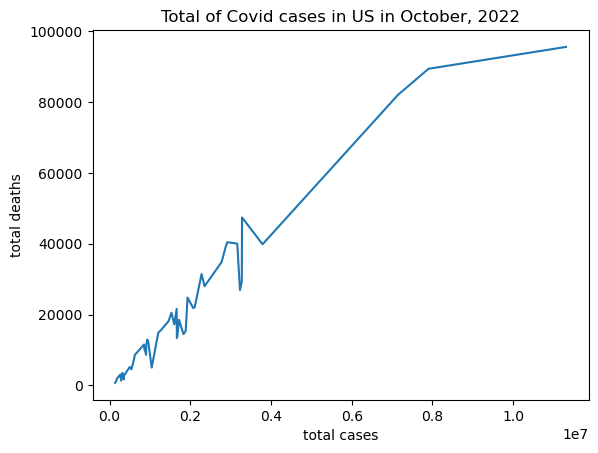

In [448]:
sns.lineplot(data = covid4, x = 'tot_cases', y = 'tot_death').set(title = 'Total of Covid cases in US in October, 2022', 
                                                                  xlabel = 'total cases', ylabel = 'total deaths')

- Do you observe a relationship between these variables? 

- Attempt to fit this data to: \
a) linear function \
b) a polynomial function  \
Generate a plot for each fit: with original data and linear fit, and polynomial fit.  \

What are the fit errors? Discuss


 a) linear function

Fit error: 148398542.21


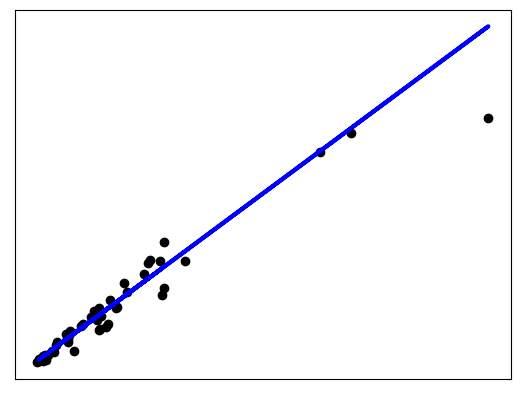

In [449]:
# Split the data into training/testing sets
tot_cases_x_train = tot_cases_X[:-10]
tot_cases_x_test = tot_cases_X[-10:]

# Split the targets into training/testing sets
tot_death_y_train = tot_death_y[:-10]
tot_death_y_test = tot_death_y[-10:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(tot_cases_x_train, tot_death_y_train)

# Make predictions using the testing set
tot_death_y_pred = regr.predict(tot_cases_x_test)

print("Fit error: %.2f" % mean_squared_error(tot_death_y_test, tot_death_y_pred))

# Plot outputs
plt.scatter(tot_cases_x, tot_death_y, color="black")
plt.plot(tot_cases_x_test, tot_death_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()

b) polynomial 

/Users/lamtran/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.81124e-59): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


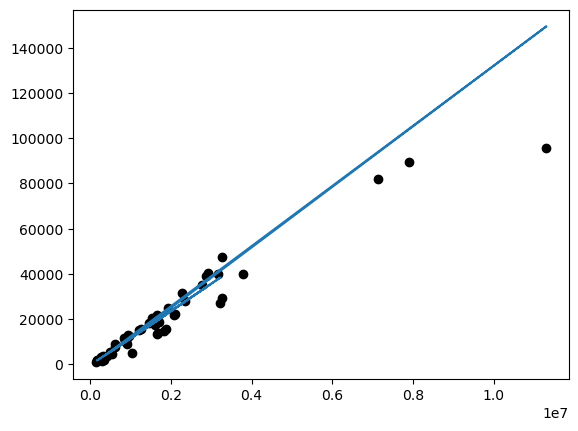

In [450]:
model = make_pipeline(PolynomialFeatures(4), Ridge(alpha=1e-3))
model.fit(tot_cases_x_train, tot_death_y_train)
y_plot = model.predict(tot_cases_x_test)
plt.plot(tot_cases_x_test, y_plot, label=f"degree {4}")
plt.scatter(tot_cases_x, tot_death_y, color="black")

Consider data for the following states: Washington, Kentucky, Georgia, and California.\
a) Plot new cases over time. \
b) Plot total cases over time.  \
c) Find population count for each state and normalize new cases data and total cases data. Replot a) and b).  \
d) Discuss the results.

a) Plot new cases over time.

[Text(0.5, 1.0, 'Total of Covid in US'),
 Text(0.5, 0, 'date'),
 Text(0, 0.5, 'new cases')]

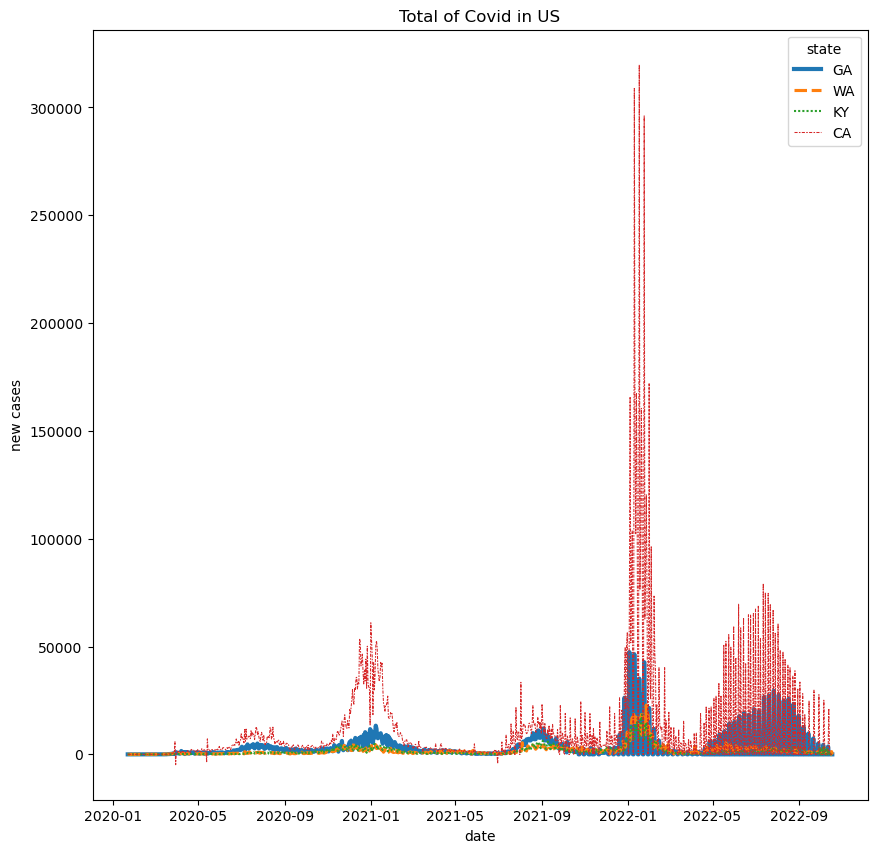

In [451]:
covid5 = covid[covid.state.isin(["CA","GA","KY", "WA"])]
fig = plt.subplots(figsize=(10, 10))
sns.lineplot(data = covid5, x = covid5.submission_date, y = covid5.new_case, hue = covid5.state, style = covid5.state, size = covid5.state).set(title = 'Total of Covid in US', 
                                                                              xlabel = 'date',
                                                                              ylabel = 'new cases')

b) Plot total cases over time.

[Text(0.5, 1.0, 'Total of Covid in US'),
 Text(0.5, 0, 'date'),
 Text(0, 0.5, 'total cases')]

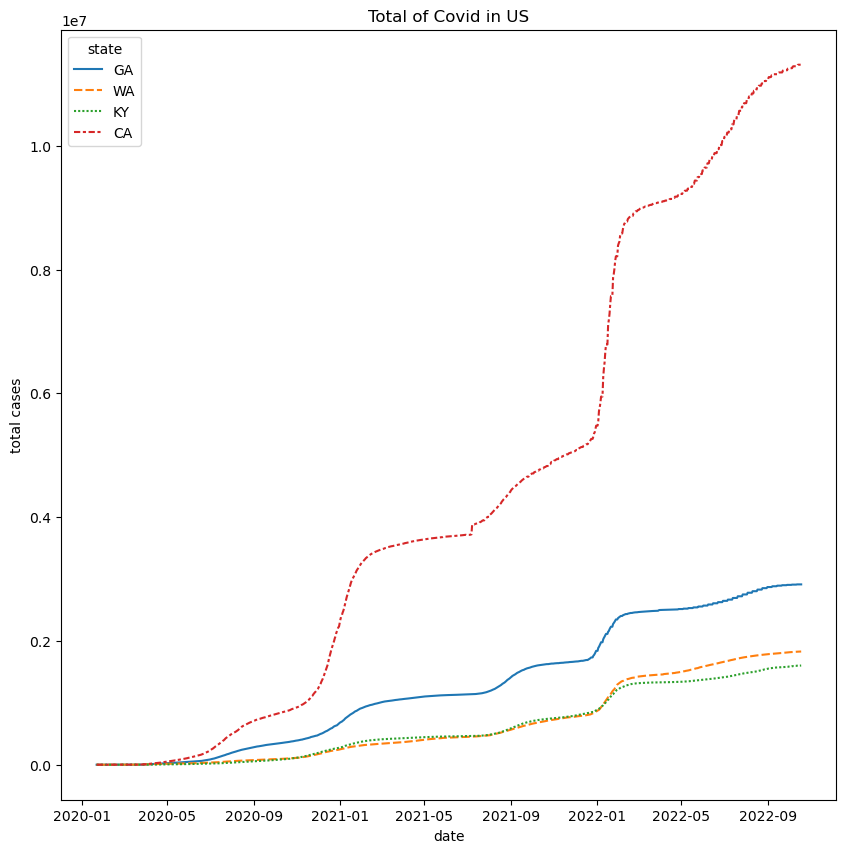

In [452]:
fig = plt.subplots(figsize=(10, 10))
sns.lineplot(data = covid5, x = covid5.submission_date, y = covid5.tot_cases, hue = covid5.state, style = covid5.state).set(title = 'Total of Covid in US', 
                                                                              xlabel = 'date',
                                                                              ylabel = 'total cases')

c) Find population count for each state and normalize new cases data and total cases data.

Population of each state in 2021:
- Washington(WA): 7.739 million 
- Kentucky  (KY): 4.509 million
- Georgia   (GA): 10.8 million
- California(CA): 39.24 million

Normalize new cases data and total cases data:
- (New cases / population size) * 100000 
- (total cases / population size) * 100000

Replot  a) & b)

a) Plot new cases over time

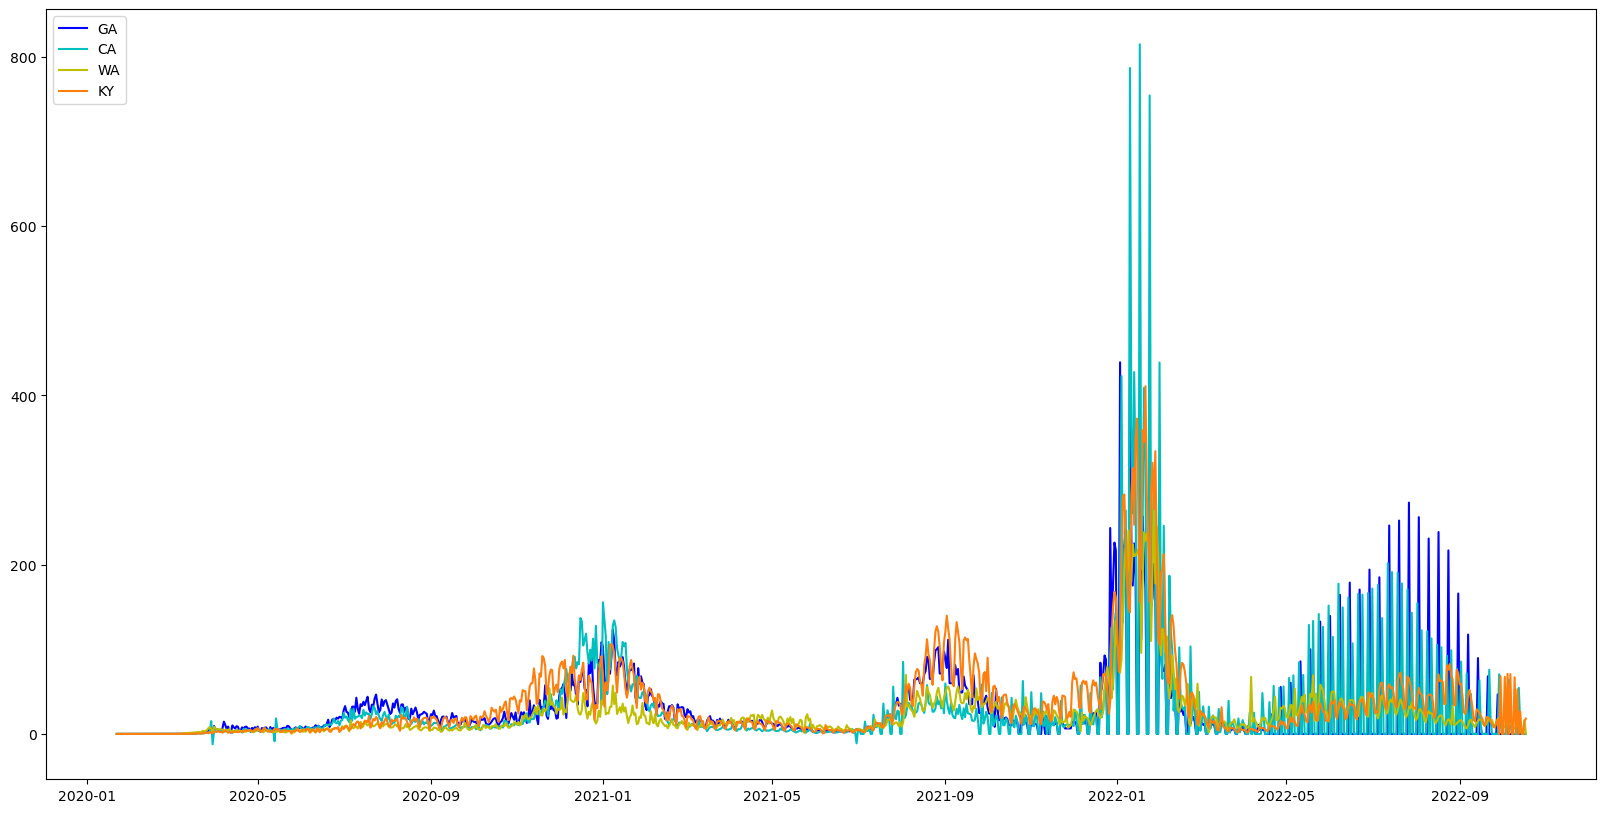

In [453]:
fig = plt.subplots(figsize=(20, 10))

Normal_new_GA = ( ((covid3[covid3.state.isin([ "GA"])]).new_case) / (10.8 * 1000000) ) * 100000 
date_GA = (covid3[covid3.state.isin([ "GA"])]).submission_date
plt.plot(date_GA, Normal_new_GA,color = 'b', label = 'GA')

Normal_new_CA = ( ((covid3[covid3.state.isin([ "CA"])]).new_case) / (39.24 * 1000000) ) * 100000
date_CA = (covid3[covid3.state.isin([ "CA"])]).submission_date
plt.plot(date_CA, Normal_new_CA, label = 'CA', color ='c')

Normal_new_WA = (( (covid3[covid3.state.isin([ "WA"])]).new_case) / (7.739 * 1000000) ) * 100000
date_WA = (covid3[covid3.state.isin([ "WA"])]).submission_date
plt.plot(date_WA, Normal_new_WA, label = 'WA', color ='y')

Normal_new_KY = ( ((covid3[covid3.state.isin([ "KY"])]).new_case) / (4.509 * 1000000) ) * 100000
date_KY = (covid3[covid3.state.isin([ "KY"])]).submission_date
plt.plot(date_KY, Normal_new_KY, label = 'KY', color ='tab:orange')
leg = plt.legend(loc='upper left')

b)Plot total cases over time.

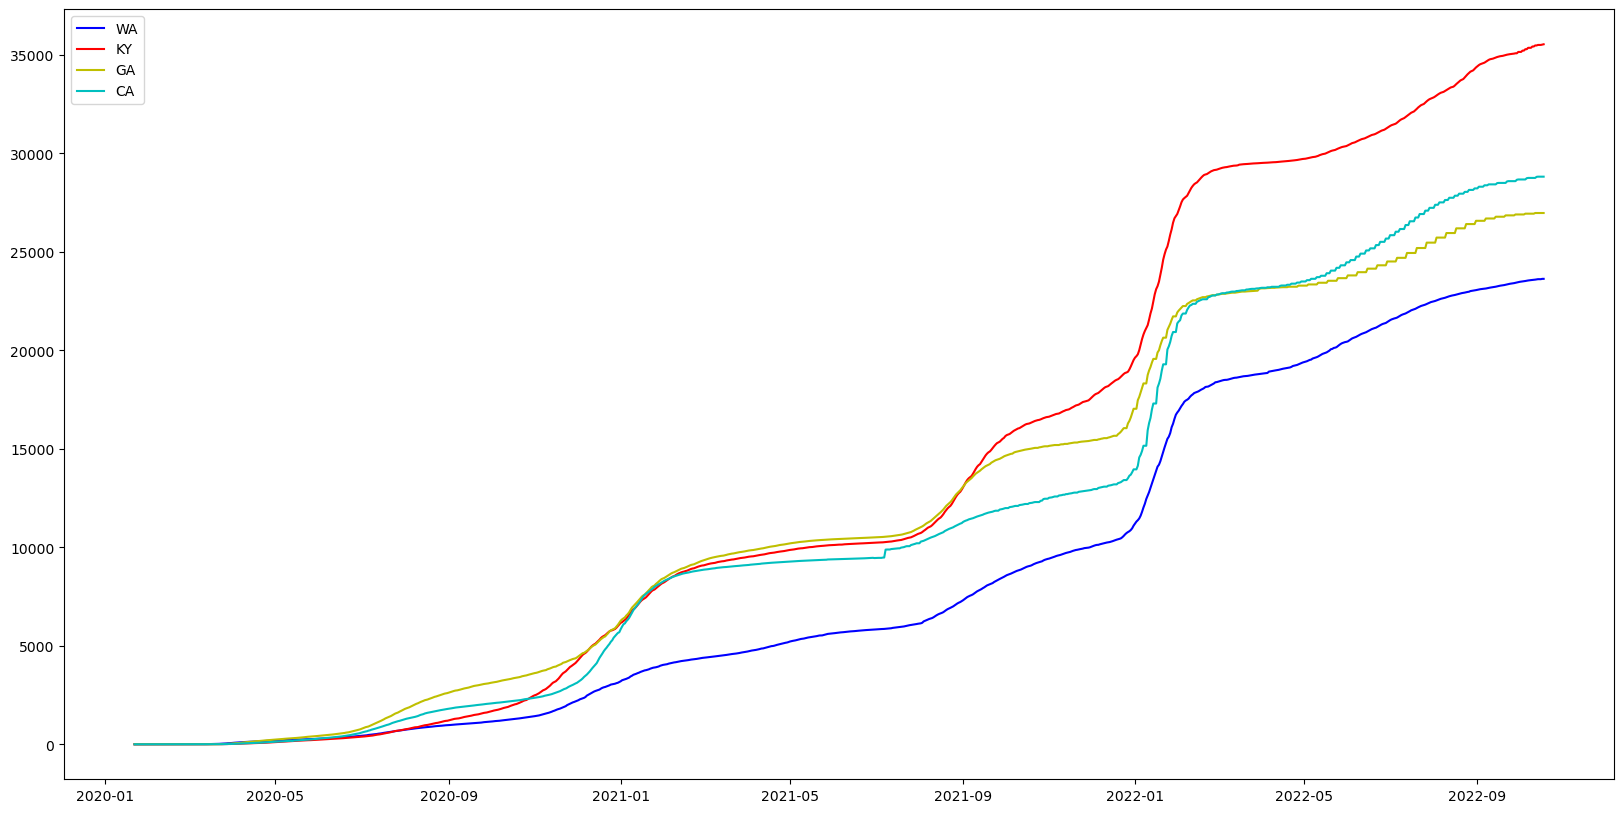

In [455]:
fig = plt.subplots(figsize=(20, 10))

Normal_tot_WA = ((covid3[covid3.state.isin([ "WA"])]).tot_cases / (7.739 * 1000000) ) * 100000 
date_WA = (covid3[covid3.state.isin([ "WA"])]).submission_date
plt.plot(date_WA, Normal_tot_WA,color = 'b', label = 'WA')

Normal_tot_KY = ((covid3[covid3.state.isin([ "KY"])]).tot_cases / (4.509 * 1000000) ) * 100000 
date_KY = (covid3[covid3.state.isin([ "KY"])]).submission_date
plt.plot(date_KY, Normal_tot_KY,color = 'r', label = 'KY')

Normal_tot_GA = ( (covid3[covid3.state.isin([ "GA"])]).tot_cases / (10.8 * 1000000) ) * 100000 
date_GA = (covid3[covid3.state.isin([ "GA"])]).submission_date
plt.plot(date_GA, Normal_tot_GA,color = 'y', label = 'GA')

Normal_tot_CA = ( (covid3[covid3.state.isin([ "CA"])]).tot_cases / (39.24 * 1000000) ) * 100000
date_CA = (covid3[covid3.state.isin([ "CA"])]).submission_date
plt.plot(date_CA, Normal_tot_CA,color = 'c', label = 'CA')

leg = plt.legend(loc='upper left')